<div class="alert alert-block alert-info">
    <h2 align="center">Digit recognition using KNN</h2>
    <h4 align="center"><a href="https://t.me/afsharino">Mohammad Afshari</a></h4>
</div>

<style>
.aligncenter {
    text-align: center;
}
</style>
<p class="aligncenter">
    <img src = "https://bigdata-ir.com/wp-content/uploads/2019/08/0123456789-660x330.jpg"  width=70%>
</p>

### Import libraries

In [1]:
# Scientific 
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt

# Load dataset
from HodaDatasetReader import read_hoda_cdb, read_hoda_dataset

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Image
from PIL import Image

# Others
import os
import glob
import warnings
warnings.filterwarnings("ignore")

### Find dataset path

In [2]:
# print current working directory
print(f"current working directory: {os.getcwd()}")

# Change directory
os.chdir("/home/afsharino/Desktop/Term 08/05.Data mining/Projects/01/")

# list all of file in directory
print(f"list of directories in {os.getcwd()}: {os.listdir()}")

# Change directory
os.chdir("/home/afsharino/Desktop/Term 08/05.Data mining/Projects/01/datasets")

# list all of file in directory
print(f"list of directories in {os.getcwd()}: {os.listdir()}")

# Change directory
os.chdir("/home/afsharino/Desktop/Term 08/05.Data mining/Projects/01/datasets/DigitDB")

# list all of file in directory
print(f"list of directories in {os.getcwd()}: {os.listdir()}")

# print current working directory
print(f"current working directory: {os.getcwd()}")

current working directory: /home/afsharino/Desktop/Term 08/05.Data mining/Projects/01/src
list of directories in /home/afsharino/Desktop/Term 08/05.Data mining/Projects/01: ['src', 'images', 'datasets']
list of directories in /home/afsharino/Desktop/Term 08/05.Data mining/Projects/01/datasets: ['DigitDB']
list of directories in /home/afsharino/Desktop/Term 08/05.Data mining/Projects/01/datasets/DigitDB: ['Train 60000.cdb', 'Test 20000.cdb', 'RemainingSamples.cdb']
current working directory: /home/afsharino/Desktop/Term 08/05.Data mining/Projects/01/datasets/DigitDB


### Load dataset

In [3]:
print('Reading Train 60000.cdb ...')
train_images, train_labels = read_hoda_dataset(r'/home/afsharino/Desktop/'
                                               r'Term 08/05.Data mining/Projects/'
                                               r'01/datasets/DigitDB/Train 60000.cdb',
                                               images_height=32,
                                               images_width=32,
                                               one_hot=False,
                                               reshape=True)
print('Done.')

print('Reading Test 20000.cdb ...')
test_images, test_labels = read_hoda_dataset(r'/home/afsharino/Desktop/'
                                             r'Term 08/05.Data mining/Projects/'
                                             r'01/datasets/DigitDB/Test 20000.cdb',
                                             images_height=32,
                                             images_width=32,
                                             one_hot=False,
                                             reshape=True)
print('Done.')

print('Reading remaining samples dataset (RemainingSamples.cdb)...')
X_remaining, Y_remaining = read_hoda_dataset(r'/home/afsharino/Desktop/'
                                             r'Term 08/05.Data mining/Projects/'
                                             r'01/datasets/DigitDB/RemainingSamples.cdb',
                                             images_height=32,
                                             images_width=32,
                                             one_hot=False,
                                             reshape=True)
print('Done.')

Reading Train 60000.cdb ...
Done.
Reading Test 20000.cdb ...
Done.
Reading remaining samples dataset (RemainingSamples.cdb)...
Done.


### Inspect data

In [4]:
print(f"The dataset contains {len(train_images)} train data and "
      f"{len(test_images)} test data.")

The dataset contains 60000 train data and 20000 test data.


In [5]:
print(f"The remaining dataset contains {X_remaining.shape[0]} samples.")

The remaining dataset contains 22352 samples.


### split remained dataset and merge with other datasets

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X_remaining,
                                                    Y_remaining,
                                                    stratify=Y_remaining,
                                                    test_size=0.25)

In [7]:
train_images = np.concatenate((train_images, x_train), axis=0)
train_labels = np.concatenate((train_labels, y_train), axis=0)
test_images = np.concatenate((test_images, x_test), axis=0)
test_labels = np.concatenate((test_labels, y_test), axis=0)

In [8]:
print(f"Number of samples in testing: {test_images.shape[0]} => "
      f"{test_images.shape[0] / (80000+22352) * 100:.1f}% of the"
      f" original set")

Number of samples in testing: 25588 => 25.0% of the original set


In [9]:
print(f"Number of samples in training: {train_images.shape[0]} => "
      f"{train_images.shape[0] / (80000+22352) * 100:.1f}% of the"
      f" original set")

Number of samples in training: 76764 => 75.0% of the original set


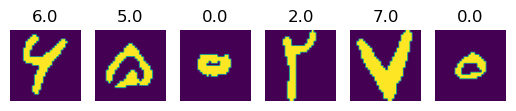

In [10]:
for i, image in enumerate(train_images[:6]):
        plt.subplot(1,6, i+1)
        plt.title(str(train_labels[i]))
        plt.imshow(image.reshape(-1,32))
        plt.axis('off')   

### Fit a model and make predictions

In [11]:
model = KNeighborsClassifier()
_ = model.fit(train_images, train_labels)

In [12]:
accuracy = model.score(test_images, test_labels)
model_name = model.__class__.__name__

print(f"The test accuracy using a {model_name} is "
      f"{accuracy*100:.3f}%")

The test accuracy using a KNeighborsClassifier is 96.061%


### Find optimal k

In [13]:
k_values = np.arange(1,50,1)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    _ = model.fit(train_images, train_labels)
    accuracy = model.score(test_images, test_labels)
    accuracies.append(accuracy)
    print(f"k: {k} ----> accuracy: {accuracy * 100:.1f}%")

max_k_index = np.argmax(accuracies)
print(" -------------------------------------------------")
print("|                                                 |")
print(f"|   k: {k_values[max_k_index]} is the optimal k with"
      f" accuracy of {accuracies[max_k_index] * 100:.1f}%   |")
print("|                                                 |")
print(" -------------------------------------------------")

k: 1 ----> accuracy: 96.3%
k: 2 ----> accuracy: 95.2%
k: 3 ----> accuracy: 96.2%
k: 4 ----> accuracy: 95.8%
k: 5 ----> accuracy: 96.1%
k: 6 ----> accuracy: 95.7%
k: 7 ----> accuracy: 95.9%
k: 8 ----> accuracy: 95.6%
k: 9 ----> accuracy: 95.7%
k: 10 ----> accuracy: 95.6%
k: 11 ----> accuracy: 95.6%
k: 12 ----> accuracy: 95.3%
k: 13 ----> accuracy: 95.3%
k: 14 ----> accuracy: 95.2%
k: 15 ----> accuracy: 95.2%
k: 16 ----> accuracy: 95.1%
k: 17 ----> accuracy: 95.1%
k: 18 ----> accuracy: 95.0%
k: 19 ----> accuracy: 94.9%
k: 20 ----> accuracy: 94.8%
k: 21 ----> accuracy: 94.8%
k: 22 ----> accuracy: 94.6%
k: 23 ----> accuracy: 94.7%
k: 24 ----> accuracy: 94.5%
k: 25 ----> accuracy: 94.5%
k: 26 ----> accuracy: 94.4%
k: 27 ----> accuracy: 94.4%
k: 28 ----> accuracy: 94.3%
k: 29 ----> accuracy: 94.3%
k: 30 ----> accuracy: 94.2%
k: 31 ----> accuracy: 94.1%
k: 32 ----> accuracy: 94.1%
k: 33 ----> accuracy: 94.0%
k: 34 ----> accuracy: 94.0%
k: 35 ----> accuracy: 93.9%
k: 36 ----> accuracy: 93.8%
k

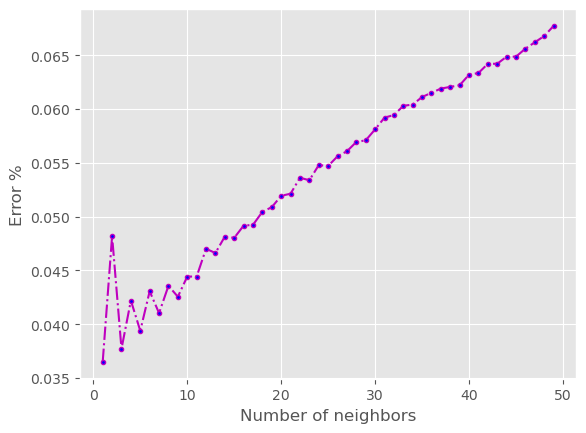

In [23]:
errors = [1-acc for acc in accuracies] 

plt.figure()
plt.plot(np.arange(1,50,1), errors, color='m', linestyle='-.', 
         marker='o',markerfacecolor='b', markersize=3)
plt.xlabel('Number of neighbors')
plt.ylabel('Error %')
plt.style.use('ggplot')
plt.show()

we can see that as the number of neighbors increse the error increse too, and also the accuracy of the model decrese in even k values.

### Retrain the model with optimal k

In [15]:
model = KNeighborsClassifier(n_neighbors=1)
_ = model.fit(train_images, train_labels)

### Evaluation

In [16]:
prediction = model.predict(test_images)
evaluation = classification_report(test_labels, prediction)
print(evaluation)

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2518
         1.0       0.93      1.00      0.97      2582
         2.0       0.88      0.94      0.91      2481
         3.0       0.94      0.89      0.91      2584
         4.0       0.97      0.93      0.95      2583
         5.0       0.99      0.96      0.98      2527
         6.0       0.98      0.98      0.98      2563
         7.0       0.99      0.99      0.99      2591
         8.0       0.97      0.99      0.98      2566
         9.0       0.99      0.96      0.97      2593

    accuracy                           0.96     25588
   macro avg       0.96      0.96      0.96     25588
weighted avg       0.96      0.96      0.96     25588



### Confusion matrix

In [17]:
cf = confusion_matrix(test_labels, prediction)

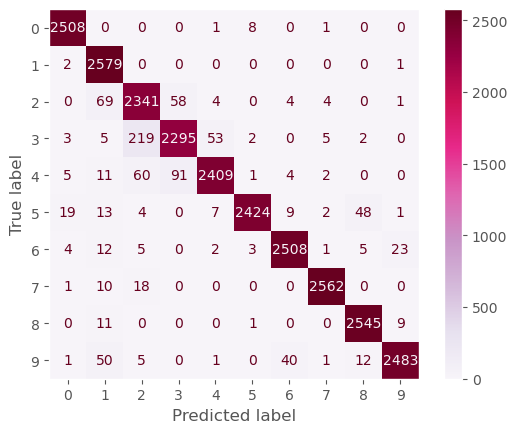

In [24]:
display = ConfusionMatrixDisplay(confusion_matrix = cf)
display.plot(cmap='PuRd')
plt.grid(False)
plt.show()

### User image prediction

In [19]:
def read_samples():
    images = []
    path = r'/home/afsharino/Desktop/Term 08/05.Data mining/Projects/01/images/'
    for image in os.listdir(path):
        image_path = path+'/'+image
        try:
            with Image.open(image_path) as img:
                img = img.resize((32, 32))
                img = (255-np.array(img).mean(axis=2).ravel()) / 255
                img = np.where(img > 0.3, 1, 0)
                images.append(img)
        except Exception as e:
            print(e)
            print(f"can't import {image}.")

    return images

In [20]:
 def predict(model, mode=1, img=None):
        images = []
        
        if mode == 1:
            images = read_samples()
        elif mode == 2:
            images = img
        else:
            print("Invalid mode number!")
        try:
            for i, image in enumerate(images):
                plt.subplot(1,len(images), i+1)
                plt.title(model.predict(image.reshape(1,-1)))
                plt.imshow(image.reshape(-1,32), cmap='gray')
                plt.axis('off')
                
        except Exception as e:
            print(f"can't predict because {e}.")

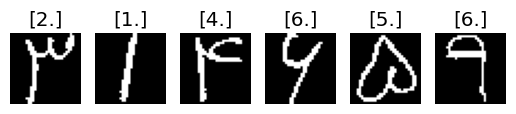

In [21]:
predict(model)